# Mission Atlantic - CS SOMAR
## Data treatment for ICCAT T2CE database
### author: Henrique Amato Peres - ha.peres@usp.br
#### 22 February 2022

Import necessary packages:

In [1]:
#! -*- coding: utf-8 -*-

import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Open .csv file containing ICCAT T2CE database sliced geographically to CS SOMAR area and surroundings, between 45°W and 10°E and between 30°S and 15°N. That decreases file size from 688 to 112 MB. Then load it as a pandas DataFrame:

In [2]:
with open('iccat_t2ce_SAt_allgr_3nov21.csv') as csvfile:
    f = list(csv.reader(csvfile))

headers = f[0]
df = pd.DataFrame(f[1:], columns=headers)
del(f)

Define data types for each column and slice to begin in 2012, similar to the temporal range of the Global Fishing Watch database:

In [3]:
species_list = ['BFT', 'ALB', 'YFT', 'BET', 'SKJ', 'SWO', 'BUM', 'SAI', 'SPF', 'WHM', 'BLF', 'BLT', 'BON', 
                'BOP', 'BRS', 'CER', 'FRI', 'KGM', 'LTA', 'MAW', 'SLT', 'SSM', 'WAH', 'DOL', 'BIL', 'BLM', 
                'MSP', 'MLS', 'RSP', 'SBF', 'oTun', 'BSH', 'POR', 'SMA', 'oSks']

for var in ['Eff1', 'Eff2', 'BFT', 'ALB', 'YFT', 'BET', 'SKJ', 'SWO', 'BUM', 'SAI', 'SPF', 'WHM', 'BLF', 
            'BLT', 'BON', 'BOP', 'BRS', 'CER', 'FRI', 'KGM', 'LTA', 'MAW', 'SLT', 'SSM', 'WAH', 'DOL', 
            'BIL', 'BLM', 'MSP', 'MLS', 'RSP', 'SBF', 'oTun', 'BSH', 'POR', 'SMA', 'oSks']:
    df[var] = pd.to_numeric(df[var], errors='coerce')

df = df.astype({'StrataID': 'int64', 'DSetID': 'int64', 'FleetID': 'string', 'GearGrpCode': 'string', 
                'GearCode': 'string', 'FileTypeCode': 'string', 'YearC': 'int64', 'TimePeriodID': 'int64', 
                'SquareTypeCode': 'string', 'QuadID': 'int64', 'Lat': 'float64', 'Lon': 'float64', 
                'SchoolTypeCode': 'string', 'Eff1': 'float64', 'Eff1Type': 'string', 'Eff2': 'float64', 
                'Eff2Type': 'string', 'DSetTypeID': 'string', 'CatchUnit': 'string', 'BFT': 'float64', 
                'ALB': 'float64', 'YFT': 'float64', 'BET': 'float64', 'SKJ': 'float64', 'SWO': 'float64', 
                'BUM': 'float64', 'SAI': 'float64', 'SPF': 'float64', 'WHM': 'float64', 'BLF': 'float64', 
                'BLT': 'float64', 'BON': 'float64', 'BOP': 'float64', 'BRS': 'float64', 'CER': 'float64', 
                'FRI': 'float64', 'KGM': 'float64', 'LTA': 'float64', 'MAW': 'float64', 'SLT': 'float64', 
                'SSM': 'float64', 'WAH': 'float64', 'DOL': 'float64', 'BIL': 'float64', 'BLM': 'float64', 
                'MSP': 'float64', 'MLS': 'float64', 'RSP': 'float64', 'SBF': 'float64', 'oTun': 'float64', 
                'BSH': 'float64', 'POR': 'float64', 'SMA': 'float64', 'oSks': 'float64'})


In [4]:
#df = df[df['YearC'] > 2011]

Legend for species code:
<br/><br/>

##### Tuna (major species)

BFT: Atlantic bluefin tuna, *Thunnys thynnus*

ALB: Albacore, *Thunnus alalunga*

YFT: Yellowfin tuna, *Thunnus albacares*

BET: Bigeye tuna, *Thunnus obesus*

SKJ: Skipjack tuna, *Katsuwonus pelamis*

SWO: Swordfish, *Xiphias gladius*

BUM: Blue marlin, *Makaira nigricans*

SAI: Atlantic sailfish, *Istiophorus albicans*

SPF: Longbill spearfish, *Tetrapturus pfluegeri*

WHM: White marlin, *Tetrapturus albidus*
<br/><br/>
##### Tuna (small tuna)

BLF: Blackfin tuna, *Thunnus atlanticus*

BLT: Bullet tuna, *Auxis rochei*

BON: Atlantic bonito, *Sarda sarda*

BOP: Plain bonito, *Orcynopsis unicolor*

BRS: Serra Spanish mackerel, *Scomberomorus brasiliensis*

CER: Cero, *Scomberomorus regalis*

FRI: Frigate tuna, *Auxis thazard*

KGM: King mackerel, *Scomberomorus cavalla*

LTA: Little tunny (= Atl. black skipj), *Euthynnus alletteratus*

MAW: West African Spanish mackerel, *Scomberomorus tritor*

SLT: Slender tuna, *Allothunnus fallai*

SSM: Atlantic Spanish mackerel, *Scomberomorus maculatus*

WAH: Wahoo, *Acanthocybium solandri*

DOL: Common dolphinfish, *Coryphaena hippurus*
<br/><br/>
##### Tuna (other species)

BIL: Marlins, sailfishes, etc., Istiophoridae

BLM: Black marlin, *Makaira indica*

MSP: Mediterranean spearfish, *Tetrapturus belone*

MLS: Striped marlin, *Tetrapturus audax*

RSP: Roundscale spearfish, *Tetrapturus georgii*

SBF: Southern bluefin tuna, *Thunnus maccoyii*

oTun: Other tuna species
<br/><br/>
##### Sharks (major species)

BSH: Blue shark, *Prionace glauca*

POR: Porbeagle, *Lamna nasus*

SMA: Shortfin mako, *Isurus oxyrinchus*

oSks: Other shark species

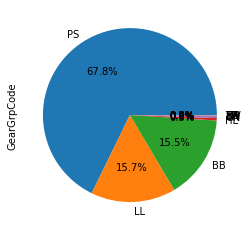

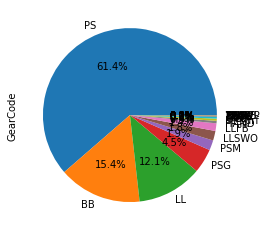

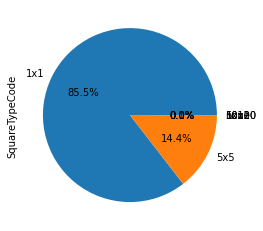

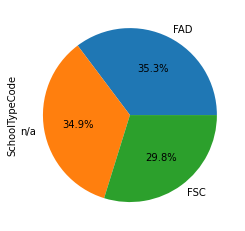

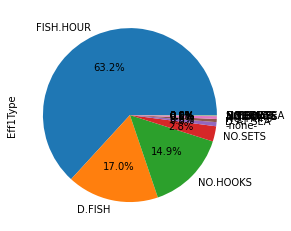

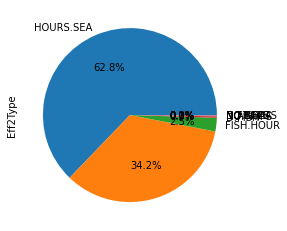

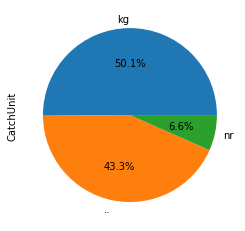

<Figure size 432x288 with 0 Axes>

In [5]:
for var in ['GearGrpCode', 'GearCode', 'SquareTypeCode', 'SchoolTypeCode', 'Eff1Type', 
            'Eff2Type', 'CatchUnit']:
    df[var].value_counts().plot.pie(autopct='%.1f%%')
    plt.show()
    plt.clf()

Legend for gear code:
<br/><br/>
PS: Purse seine

LL: Longline

BB: Baiboat

LLSWO: Longline, targetting SWO (used by Italy)

HAND: Handline

LL-surf: Longline, surface (used by Italy)

GILL: Gillnet, drift net

UNCL: Unclassified, gears not reported

TRAW: Trawl

LLJAP: Longline, japanese (Spain)

TROL: Trolling

SPOR: Sport, recreational fisheries (mostly rod and reel)

TRAWP: Trawl, mid-water pelagic trawl (= MWT)

HS: Haul seine

PSFS: Purne seine, catching small fish

SURF: Surface fisheries unclassified

### Exploring effort and gears in each dataset

In [6]:
sank = df.groupby(['SquareTypeCode', 'GearCode', 'Eff1Type', 'Eff2Type']).size().reset_index(name='counts')

sank2 = df.groupby(['GearGrpCode', 'Eff1Type', 'Eff2Type']).agg({'Eff1': ['count', 'min', 'max', 'median'], 
                                                  'Eff2': ['min', 'max', 'median']})

pd.set_option('display.max_rows', 140)
print(sank)

    SquareTypeCode GearCode   Eff1Type   Eff2Type  counts
0            10x10       BB     -none-                  5
1            10x10       BB   D.AT SEA                  1
2            10x10     HAND     -none-                 36
3            10x10       LL     -none-                  1
4            10x10       LL     D.FISH                 14
5            10x10       LL   NO.HOOKS                 88
6            10x10       LL   NO.HOOKS     D.FISH      31
7            10x10       LL   NO.HOOKS   NO.BOATS      36
8            10x10  LL-surf     -none-                  8
9            10x10       PS     -none-                  1
10           10x10       PS   D.AT SEA                  3
11           10x10       PS     D.FISH                 73
12           10x10     SURF     -none-                114
13           10x10     SURF     D.FISH                 10
14           10x10     UNCL     -none-                  1
15           10x20  LL-surf     -none-                  9
16            

In [7]:
n_total = df.shape[0]
print(n_total)

### Selection as descripted above
df_s = df[(df['SquareTypeCode']=='1x1') | (df['SquareTypeCode']=='5x5')]
df_s = df_s[(df_s['GearGrpCode']=='LL') | (df_s['GearGrpCode']=='BB') | (df_s['GearGrpCode']=='PS')]
df_s = df_s[(df_s['Eff1Type']=='FISH.HOUR') | (df_s['Eff1Type']=='D.FISH') | (df_s['Eff1Type']=='NO.HOOKS') | (df_s['Eff2Type']=='FISH.HOUR')]
df_s = df_s[(df_s['TimePeriodID']!=15) & (df_s['TimePeriodID']!= 17)]

indexes = df_s[ (df_s['GearGrpCode']=='LL') & (df_s['Eff1Type']=='D.FISH') ].index
df_s.drop(indexes, inplace=True)   # drop LL records with only D.FISH

n_selected = df_s.shape[0]
print(n_selected)
print('ratio =', n_selected / n_total)

587035
570808
ratio = 0.97235769587844


In [8]:
sank3 = df_s.groupby(['SquareTypeCode', 'GearGrpCode', 'GearCode', 'Eff1Type', 'Eff2Type']).size().reset_index(name='counts')
print(sank3)

   SquareTypeCode GearGrpCode GearCode   Eff1Type   Eff2Type  counts
0             1x1          BB       BB     D.FISH              27518
1             1x1          BB       BB     D.FISH   D.AT SEA      26
2             1x1          BB       BB     D.FISH    NO.SETS      27
3             1x1          BB       BB  FISH.HOUR                 27
4             1x1          BB       BB  FISH.HOUR   D.AT SEA     128
5             1x1          BB       BB  FISH.HOUR  HOURS.SEA   50872
6             1x1          BB       BB    NO.SETS  FISH.HOUR    3226
7             1x1          BB      BBF     D.FISH                442
8             1x1          LL       LL   NO.HOOKS              10967
9             1x1          LL       LL   NO.HOOKS     D.FISH      20
10            1x1          LL  LL-surf   NO.HOOKS                355
11            1x1          LL     LLFB   NO.HOOKS               3601
12            1x1          LL    LLJAP   NO.HOOKS                 27
13            1x1          LL    L

We prioritize some types of data, excluding others, concerning:

(1) square type: use only squares < 5°, i.e. only 1x1 and 5x5 squares, excluding 5x10 and 10x10;

(2) fishing gear: use only bait-boat, longline and purse seine (BB, LL and PS), excluding minor gears like gillnets, trolling, trawling, sport fishing, handline and other unclassified gears;

(3) effort type: use only fishing-time-related effort types, like fishing days (D.FISH) and fishing hours (FISH.HOUR) for BB and PS gears; and only number of hooks (NO.HOOKS) for LL gears.

The number of datasets that meet these criteria is 103,375, from a total of 108,411, i.e. 95.35% of all datasets available are kept.

(*) Each dataset has a single SquareTypeCode, a single Gear Type and a single Effort Type.


### Gridding and plotting fishing effort

In [9]:
### Grid 1x1 to plot
Lon = np.arange(-46, 13, 1)
Lat = np.arange(-31, 16, 1)

In [10]:
year = df_s['YearC'].unique()
month = np.array([np.arange(1,7,1), np.arange(7,13,1)])

print(month)
print(year)
print(year.shape[0])

###### EFFORT
### shape = (year(64), semester(2), effort(2), lon(59), lat(47))
### effort(2) = [eff_hour, eff_hook]
C_h = np.zeros((64, 2, 2, len(Lon), len(Lat)))

###### CAPTURE
### shape = (year(64), semester(2), capture(10), lon(59), lat(47))
### capture(10) = [Tmh, Tmk, Tsh, Tsk, Toh, Tok, Smh, Smk, Soh, Sok]
        ### 1st letter = T: tuna, S: shark
        ### 2nd letter = m: major, s:small, o:other
        ### 3rd letter = h: hour, k:hook
C_c = np.zeros((64, 2, 10, len(Lon), len(Lat)))

### method to recollect csv and reshape

#np.savetxt('aaa_testeeeee.csv', np.ravel(C_h), delimiter=',')
#print(C_h.shape)          (64, 12, 7, 59, 47)
#C_rav = np.ravel(C_h)
#print(C_rav.shape)        (14907648,)
#C_rebu = np.reshape(C_rav, (64, 12, 7, 59, 47))
#print(C_rebu.shape)       (64, 12, 7, 59, 47)

[[ 1  2  3  4  5  6]
 [ 7  8  9 10 11 12]]
[1956 1957 1958 1959 1960 1961 1962 1963 1964 1965 1966 1967 1968 1969
 1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983
 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997
 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011
 2012 2013 2014 2015 2016 2017 2018 2019]
64


In [11]:
df_s['TimePeriodID'].value_counts()

12    51199
10    50813
11    49848
1     48989
3     48795
4     48274
5     47654
2     47276
9     47023
8     44005
6     43467
7     43465
Name: TimePeriodID, dtype: int64

### Effort

In [12]:
for yi, y in enumerate(year):                  # Treat each year, then each dataset
    df_y = df_s[df_s['YearC']==y]
    dsets = df_y['DSetID'].unique()
    print('>>>>', y, len(dsets))
    for di, d in enumerate(dsets):
        df_d = df_y[df_y['DSetID']==d]  # until here, we are selecting a single dataset
        print(di+1, df_d['GearCode'].unique()[0], df_d['SquareTypeCode'].unique()[0], 
              df_d['Eff1Type'].unique()[0], df_d['Eff2Type'].unique()[0])
        #print(df_d.shape)
        for mi, m in enumerate(month):
            df_m = df_d[df_d['TimePeriodID'].isin(m)]   # selecting semester
            df_h1 = df_m[(df_m['Eff1Type']=='FISH.HOUR')]  # Assign dataframes with one effort type each
            df_h2 = df_m[(df_m['Eff2Type']=='FISH.HOUR')]
            df_h3 = df_m[(df_m['Eff1Type']=='D.FISH')]
            df_k = df_m[(df_m['Eff1Type']=='NO.HOOKS')]

            #print(df_h1.shape, df_h2.shape, df_h3.shape, df_k.shape)
            sum_h1 = df_h1.groupby(['Lon', 'Lat'], as_index=False)['Eff1'].sum()  # Sum of all effort in Lat Lon
            sum_h2 = df_h2.groupby(['Lon', 'Lat'], as_index=False)['Eff2'].sum()
            sum_h3 = df_h3.groupby(['Lon', 'Lat'], as_index=False)['Eff1'].sum()
            sum_k = df_k.groupby(['Lon', 'Lat'], as_index=False)['Eff1'].sum()
            
        
            for i, lo in enumerate(Lon):         # Iterate over grid 
                for j, la in enumerate(Lat):
                    eff_h1_b = sum_h1[sum_h1['Lon']==lo+.5]
                    eff_h1 = eff_h1_b[eff_h1_b['Lat']==la+.5]
                    eff_h2_b = sum_h2[sum_h2['Lon']==lo+.5]    # Locate in each Effort Dataframe
                    eff_h2 = eff_h2_b[eff_h2_b['Lat']==la+.5]  # the iterated LatLon
                    eff_h3_b = sum_h3[sum_h3['Lon']==lo+.5]
                    eff_h3 = eff_h3_b[eff_h3_b['Lat']==la+.5]
                    eff_k_b = sum_k[sum_k['Lon']==lo+.5]
                    eff_k = eff_k_b[eff_k_b['Lat']==la+.5]
                    #if ((di == 3) and (lo==-20) and (la==10)):
                    #    print(lo, la, eff_h1)
                
                    area = 111.195 * 111.195 * np.cos(la*np.pi/180)
                
                    try:
                        if df_m['SquareTypeCode'].unique()[0] == '5x5':
                            C_h[yi, mi, 1, i-2:i+3, j-2:j+3] += eff_k.iat[0,2] / (area * 25)  # If data is
                        else:                                # 5x5, distribute effort over 25 1x1 cells
                            C_h[yi, mi, 1, i, j] += eff_k.iat[0,2] / area
                    except IndexError:
                        pass

                    eff_h1 = eff_h1.copy()
                    eff_h2 = eff_h2.copy()
                    eff_h3 = eff_h3.copy()
                
                    if eff_h1.empty:
                        eff_h1 = pd.DataFrame([[0, 0, 0]])      # For hours efforts,
                    if eff_h2.empty:                            # the sum requires no NaNs
                        eff_h2 = pd.DataFrame([[0, 0, 0]])
                    if eff_h3.empty:
                        eff_h3 = pd.DataFrame([[0, 0, 0]])
                
                    try:
                        if df_d['SquareTypeCode'].unique()[0] == '5x5':
                            val = (eff_h1.iat[0,2] + eff_h2.iat[0,2] + eff_h3.iat[0,2]*24) / (area*25)
                            C_h[yi, mi, 0, i-2:i+3, j-2:j+3] += val     # Days fishing multiplied by 24
                        else:
                            val = (eff_h1.iat[0,2] + eff_h2.iat[0,2] + eff_h3.iat[0,2]*24) / area  
                            C_h[yi, mi, 0, i, j] += val
                    except IndexError:
                        pass
                    
            
                '''if ((la == -28) and (lo==-43)):
                    print(lo, la, eff_k.iat[0,2])
                    break
            if lo == -42:
                break'''
    
C_h[C_h == 0] = np.nan    # Replace all zeros by NaNs, so they stay white in the map

#sank3 = df.groupby(['SquareTypeCode', 'GearCode', 'Eff1Type', 'Eff2Type']).size().reset_index(name='counts')
#print(sank3)

>>>> 1956 1
1 LL 5x5 NO.HOOKS 
>>>> 1957 1
1 LL 5x5 NO.HOOKS 
>>>> 1958 1
1 LL 5x5 NO.HOOKS 
>>>> 1959 1
1 LL 5x5 NO.HOOKS 
>>>> 1960 1
1 LL 5x5 NO.HOOKS 
>>>> 1961 1
1 LL 5x5 NO.HOOKS 
>>>> 1962 1
1 LL 5x5 NO.HOOKS 
>>>> 1963 1
1 LL 5x5 NO.HOOKS 
>>>> 1964 1
1 LL 5x5 NO.HOOKS 
>>>> 1965 1
1 LL 5x5 NO.HOOKS 
>>>> 1966 2
1 LL 5x5 NO.HOOKS 
2 LL 5x5 NO.HOOKS 
>>>> 1967 4
1 LLFB 5x5 NO.HOOKS 
2 LL 5x5 NO.HOOKS 
3 LL 5x5 NO.HOOKS 
4 PS 1x1 D.FISH 
>>>> 1968 4
1 LLFB 5x5 NO.HOOKS 
2 LL 5x5 NO.HOOKS 
3 LL 5x5 NO.HOOKS 
4 PS 1x1 D.FISH 
>>>> 1969 8
1 LLFB 5x5 NO.HOOKS 
2 BB 1x1 D.FISH 
3 LL 5x5 NO.HOOKS 
4 LL 5x5 NO.HOOKS 
5 PS 1x1 D.FISH 
6 BB 1x1 D.FISH 
7 PSG 1x1 D.FISH 
8 PSM 1x1 D.FISH 
>>>> 1970 8
1 LLFB 5x5 NO.HOOKS 
2 BB 1x1 D.FISH 
3 LL 5x5 NO.HOOKS 
4 PS 1x1 D.FISH 
5 LL 5x5 NO.HOOKS 
6 BB 1x1 D.FISH 
7 PSG 1x1 D.FISH 
8 PSM 1x1 D.FISH 
>>>> 1971 8
1 LLFB 5x5 NO.HOOKS 
2 BB 1x1 D.FISH 
3 LL 5x5 NO.HOOKS 
4 PS 1x1 D.FISH 
5 LL 5x5 NO.HOOKS 
6 BB 1x1 D.FISH 
7 PSG 1x1 D.FISH 
8 PSM 1x

7 LL 5x5 NO.HOOKS 
8 BB 1x1 D.FISH 
9 PS 1x1 D.FISH 
10 LL 5x5 NO.HOOKS 
11 PS 1x1 D.FISH 
12 LL 5x5 NO.HOOKS 
13 LLSWO 5x5 NO.HOOKS 
14 PSG 1x1 D.FISH 
15 PSM 1x1 D.FISH 
16 LL 1x1 NO.HOOKS 
17 BB 1x1 D.FISH 
18 BB 5x5 D.FISH 
19 PS 5x5 D.FISH 
20 LL 5x5 NO.HOOKS 
21 BB 1x1 D.FISH 
22 PS 1x1 D.FISH 
23 BB 5x5 D.FISH 
>>>> 1990 23
1 BB 1x1 D.FISH 
2 LL 5x5 NO.HOOKS 
3 BBF 1x1 D.FISH 
4 LL 5x5 NO.HOOKS 
5 LL 5x5 NO.HOOKS 
6 LL 5x5 NO.HOOKS 
7 BB 1x1 D.FISH 
8 PS 1x1 D.FISH 
9 LL 5x5 NO.HOOKS 
10 PS 1x1 D.FISH 
11 LL 5x5 NO.HOOKS 
12 LLSWO 5x5 NO.HOOKS 
13 PSG 1x1 D.FISH 
14 PSM 1x1 D.FISH 
15 LL 1x1 NO.HOOKS 
16 PSG 1x1 D.FISH 
17 BB 5x5 D.FISH 
18 BB 1x1 FISH.HOUR 
19 PS 5x5 D.FISH 
20 BB 1x1 D.FISH 
21 PS 1x1 D.FISH 
22 BB 5x5 D.FISH 
23 PS 1x1 FISH.HOUR 
>>>> 1991 24
1 BB 1x1 D.FISH 
2 LL 5x5 NO.HOOKS 
3 BBF 1x1 D.FISH 
4 LL 5x5 NO.HOOKS 
5 LL 5x5 NO.HOOKS 
6 LL 5x5 NO.HOOKS 
7 BB 1x1 FISH.HOUR HOURS.SEA
8 PS 1x1 FISH.HOUR HOURS.SEA
9 LL 5x5 NO.HOOKS 
10 PS 1x1 D.FISH 
11 LL 5x5 NO.H

34 PS 1x1 FISH.HOUR HOURS.SEA
>>>> 2001 35
1 BB 1x1 D.FISH 
2 LL 5x5 NO.HOOKS 
3 LL 5x5 NO.HOOKS 
4 LL 5x5 NO.HOOKS 
5 LL 5x5 NO.HOOKS 
6 LL 5x5 NO.HOOKS 
7 LL 5x5 NO.HOOKS 
8 LL 5x5 NO.HOOKS 
9 LL 5x5 NO.HOOKS 
10 LL 5x5 NO.HOOKS 
11 LL 5x5 NO.HOOKS 
12 LL 5x5 NO.HOOKS 
13 BB 1x1 FISH.HOUR HOURS.SEA
14 PS 1x1 FISH.HOUR HOURS.SEA
15 LL 5x5 NO.HOOKS 
16 LL 5x5 NO.HOOKS 
17 PS 1x1 FISH.HOUR HOURS.SEA
18 LLSWO 5x5 NO.HOOKS 
19 LLSWO 5x5 NO.HOOKS 
20 BB 1x1 FISH.HOUR HOURS.SEA
21 PS 1x1 FISH.HOUR HOURS.SEA
22 LL 1x1 NO.HOOKS 
23 BB 1x1 FISH.HOUR HOURS.SEA
24 PS 1x1 FISH.HOUR HOURS.SEA
25 PS 1x1 FISH.HOUR HOURS.SEA
26 BB 1x1 FISH.HOUR HOURS.SEA
27 BB 1x1 FISH.HOUR HOURS.SEA
28 PS 1x1 FISH.HOUR HOURS.SEA
29 BB 1x1 FISH.HOUR HOURS.SEA
30 PS 1x1 FISH.HOUR HOURS.SEA
31 LL 5x5 NO.HOOKS 
32 LL 5x5 NO.HOOKS 
33 PS 1x1 FISH.HOUR HOURS.SEA
34 PS 1x1 FISH.HOUR HOURS.SEA
35 PS 1x1 FISH.HOUR HOURS.SEA
>>>> 2002 41
1 BB 1x1 D.FISH 
2 LL 5x5 NO.HOOKS 
3 LL 5x5 NO.HOOKS 
4 LL 5x5 NO.HOOKS 
5 LL 5x5 NO.HOO

11 LLSWO 5x5 NO.HOOKS 
12 BB 1x1 FISH.HOUR HOURS.SEA
13 PS 1x1 FISH.HOUR HOURS.SEA
14 BB 1x1 FISH.HOUR HOURS.SEA
15 PS 1x1 FISH.HOUR HOURS.SEA
16 PS 1x1 FISH.HOUR HOURS.SEA
17 PS 1x1 FISH.HOUR HOURS.SEA
18 BB 1x1 D.FISH 
19 LL 5x5 NO.HOOKS 
20 BB 1x1 FISH.HOUR HOURS.SEA
21 PS 1x1 FISH.HOUR HOURS.SEA
22 PS 1x1 FISH.HOUR HOURS.SEA
23 LL 5x5 NO.HOOKS 
24 LL 5x5 NO.HOOKS 
25 LL 5x5 NO.HOOKS 
26 PS 1x1 FISH.HOUR HOURS.SEA
27 LL 5x5 NO.HOOKS D.FISH
28 LL 5x5 NO.HOOKS D.FISH
29 LL 5x5 NO.HOOKS D.FISH
30 LL 5x5 NO.HOOKS D.FISH
31 LL 5x5 NO.HOOKS 
32 PS 1x1 FISH.HOUR HOURS.SEA
33 PS 1x1 FISH.HOUR HOURS.SEA
>>>> 2011 33
1 BB 5x5 D.FISH 
2 LL 5x5 NO.HOOKS 
3 LL 5x5 NO.HOOKS 
4 LL 5x5 NO.HOOKS 
5 LL 5x5 NO.HOOKS 
6 BB 1x1 FISH.HOUR HOURS.SEA
7 PS 1x1 FISH.HOUR HOURS.SEA
8 LL 5x5 NO.HOOKS 
9 LL 5x5 NO.HOOKS 
10 LL-surf 1x1 NO.HOOKS 
11 LLSWO 5x5 NO.HOOKS 
12 BB 1x1 FISH.HOUR HOURS.SEA
13 PS 1x1 FISH.HOUR HOURS.SEA
14 BB 1x1 FISH.HOUR HOURS.SEA
15 PS 1x1 FISH.HOUR HOURS.SEA
16 PS 1x1 FISH.HOUR HOURS

### Capture

In [13]:
Tm = species_list[:10]
Ts = species_list[10:24]
To = species_list[24:31]
Sm = species_list[31:34]
So = species_list[34]

In [14]:
print(df_s['CatchUnit'].value_counts())
print(df_s['DSetTypeID'].value_counts())

kg    280185
..    253224
nr     37399
Name: CatchUnit, dtype: Int64
.w    519822
nw     27015
n.     23957
..        14
Name: DSetTypeID, dtype: Int64


In [15]:
sank4 = df_s.groupby(['DSetTypeID', 'YearC']).size().reset_index(name='counts')
pd.set_option('display.max_rows', 173)
print(sank4)

    DSetTypeID  YearC  counts
0           ..   1991      11
1           ..   1998       3
2           .w   1967      45
3           .w   1968      65
4           .w   1969    2186
5           .w   1970    2494
6           .w   1971    2505
7           .w   1972    3005
8           .w   1973    3327
9           .w   1974    4017
10          .w   1975    3943
11          .w   1976    4346
12          .w   1977    4686
13          .w   1978    5295
14          .w   1979    4879
15          .w   1980    6239
16          .w   1981    7575
17          .w   1982    6525
18          .w   1983    7010
19          .w   1984    6193
20          .w   1985    6565
21          .w   1986    5068
22          .w   1987    5354
23          .w   1988    5612
24          .w   1989    5882
25          .w   1990    4318
26          .w   1991    9839
27          .w   1992   11129
28          .w   1993    9975
29          .w   1994   10413
30          .w   1995   11064
31          .w   1996   19088
32        

In [16]:
print(n_total, n_selected)
df_kg2 = df_s[df_s['DSetTypeID'].isin(['.w', 'nw'])]
df_kg = df_s[df_s['CatchUnit']=='kg']
n_kg2 = df_kg2.shape[0]
n_kg = df_kg.shape[0]
print('ratio kg kg2 =', n_kg / n_kg2)
print(n_kg)
print('ratio from total =', n_kg2 / n_total)
print('ratio from selected =', n_kg2 / n_selected)

587035 570808
ratio kg kg2 = 0.5123738883799012
280185
ratio from total = 0.9315236740569132
ratio from selected = 0.9580051435859344


In [17]:
sank6 = df_kg2.groupby(['DSetTypeID', 'YearC']).size().reset_index(name='counts')
print(sank6)

    DSetTypeID  YearC  counts
0           .w   1967      45
1           .w   1968      65
2           .w   1969    2186
3           .w   1970    2494
4           .w   1971    2505
5           .w   1972    3005
6           .w   1973    3327
7           .w   1974    4017
8           .w   1975    3943
9           .w   1976    4346
10          .w   1977    4686
11          .w   1978    5295
12          .w   1979    4879
13          .w   1980    6239
14          .w   1981    7575
15          .w   1982    6525
16          .w   1983    7010
17          .w   1984    6193
18          .w   1985    6565
19          .w   1986    5068
20          .w   1987    5354
21          .w   1988    5612
22          .w   1989    5882
23          .w   1990    4318
24          .w   1991    9839
25          .w   1992   11129
26          .w   1993    9975
27          .w   1994   10413
28          .w   1995   11064
29          .w   1996   19088
30          .w   1997   17936
31          .w   1998   16599
32        

In [18]:
sank5 = df_kg.groupby(['DSetTypeID', 'YearC']).size().reset_index(name='counts')
print(sank5)

    DSetTypeID  YearC  counts
0           .w   1967       7
1           .w   1968      28
2           .w   1969    1008
3           .w   1970     915
4           .w   1971     990
5           .w   1972    1238
6           .w   1973    1736
7           .w   1974    2345
8           .w   1975    1733
9           .w   1976    2697
10          .w   1977    3164
11          .w   1978    2851
12          .w   1979    2588
13          .w   1980    3517
14          .w   1981    4749
15          .w   1982    3557
16          .w   1983    3528
17          .w   1984    3146
18          .w   1985    3843
19          .w   1986    3138
20          .w   1987    3383
21          .w   1988    3731
22          .w   1989    4381
23          .w   1990    2115
24          .w   1991    3035
25          .w   1992    3128
26          .w   1993    3034
27          .w   1994    2960
28          .w   1995    3569
29          .w   1996   10412
30          .w   1997    9611
31          .w   1998    9256
32        

In [19]:
for yi, y in enumerate(year):                  # Treat each year, then each dataset
    df_y = df_kg[df_kg['YearC']==y]
    dsets = df_y['DSetID'].unique()
    print('>>>>', y, len(dsets))
    for di, d in enumerate(dsets):
        df_d = df_y[df_y['DSetID']==d]  # until here, we are selecting a single dataset
        print(di+1, df_d['GearCode'].unique()[0], df_d['SquareTypeCode'].unique()[0], 
              df_d['Eff1Type'].unique()[0], df_d['Eff2Type'].unique()[0])
        #print(df_d.shape)
        for mi, m in enumerate(month):
            df_m = df_d[df_d['TimePeriodID'].isin(m)]   # selecting semester
            sum_Tm = df_m.groupby(['Lon', 'Lat'], as_index=False)[Tm].sum()  # Sum of all Capture in Lat Lon
            sum_Ts = df_m.groupby(['Lon', 'Lat'], as_index=False)[Ts].sum()
            sum_To = df_m.groupby(['Lon', 'Lat'], as_index=False)[To].sum()
            sum_Sm = df_m.groupby(['Lon', 'Lat'], as_index=False)[Sm].sum()
            sum_So = df_m.groupby(['Lon', 'Lat'], as_index=False)[So].sum()
                        
                
            for i, lo in enumerate(Lon):         # Iterate over grid 
                for j, la in enumerate(Lat):
                    cap_Tm_b = sum_Tm[sum_Tm['Lon']==lo+.5]
                    cap_Tm = cap_Tm_b[cap_Tm_b['Lat']==la+.5]
                    cap_Ts_b = sum_Ts[sum_Ts['Lon']==lo+.5]    # Locate in each Capture Dataframe
                    cap_Ts = cap_Ts_b[cap_Ts_b['Lat']==la+.5]  # the iterated LatLon
                    cap_To_b = sum_To[sum_To['Lon']==lo+.5]
                    cap_To = cap_To_b[cap_To_b['Lat']==la+.5]
                    cap_Sm_b = sum_Sm[sum_Sm['Lon']==lo+.5]
                    cap_Sm = cap_Sm_b[cap_Sm_b['Lat']==la+.5]
                    cap_So_b = sum_So[sum_So['Lon']==lo+.5]
                    cap_So = cap_So_b[cap_So_b['Lat']==la+.5]
                    #if ((di == 3) and (lo==-20) and (la==10)):
                    #    print(lo, la, eff_h1)
                                        
                    ### Tuna major            
                    try:                                
                        if df_m['GearGrpCode'].unique()[0] == 'LL':
                            if df_m['SquareTypeCode'].unique()[0] == '5x5':
                                C_c[yi, mi, 1, i-2:i+3, j-2:j+3] += cap_Tm.iloc[0,2:].sum()  # If data is
                            else:                 # 5x5, distribute capture over 25 1x1 cells
                                C_c[yi, mi, 1, i, j] += cap_Tm.iloc[0,2:].sum()
                        else:
                            if df_m['SquareTypeCode'].unique()[0] == '5x5':
                                C_c[yi, mi, 0, i-2:i+3, j-2:j+3] += cap_Tm.iloc[0,2:].sum()
                            else:
                                C_c[yi, mi, 0, i, j] += cap_Tm.iloc[0,2:].sum()
                    except IndexError:
                        pass
                    
                    ### Tuna small
                    try:                                 
                        if df_m['GearGrpCode'].unique()[0] == 'LL':
                            if df_m['SquareTypeCode'].unique()[0] == '5x5':
                                C_c[yi, mi, 3, i-2:i+3, j-2:j+3] += cap_Ts.iloc[0,2:].sum()
                            else:                
                                C_c[yi, mi, 3, i, j] += cap_Ts.iloc[0,2:].sum()
                        else:
                            if df_m['SquareTypeCode'].unique()[0] == '5x5':
                                C_c[yi, mi, 2, i-2:i+3, j-2:j+3] += cap_Ts.iloc[0,2:].sum()
                            else:                 
                                C_c[yi, mi, 2, i, j] += cap_Ts.iloc[0,2:].sum()
                    except IndexError:
                        pass                    
                    
                    ### Tuna other
                    try:                                 
                        if df_m['GearGrpCode'].unique()[0] == 'LL':
                            if df_m['SquareTypeCode'].unique()[0] == '5x5':
                                C_c[yi, mi, 5, i-2:i+3, j-2:j+3] += cap_To.iloc[0,2:].sum()
                            else:                 
                                C_c[yi, mi, 5, i, j] += cap_To.iloc[0,2:].sum()
                        else:
                            if df_m['SquareTypeCode'].unique()[0] == '5x5':
                                C_c[yi, mi, 4, i-2:i+3, j-2:j+3] += cap_To.iloc[0,2:].sum()
                            else:                 
                                C_c[yi, mi, 4, i, j] += cap_To.iloc[0,2:].sum()
                    except IndexError:
                        pass           
                    
                    ### Shark major
                    try:                                 
                        if df_m['GearGrpCode'].unique()[0] == 'LL':
                            if df_m['SquareTypeCode'].unique()[0] == '5x5':
                                C_c[yi, mi, 7, i-2:i+3, j-2:j+3] += cap_Sm.iloc[0,2:].sum()
                            else:                 
                                C_c[yi, mi, 7, i, j] += cap_Sm.iloc[0,2:].sum()
                        else:
                            if df_m['SquareTypeCode'].unique()[0] == '5x5':
                                C_c[yi, mi, 6, i-2:i+3, j-2:j+3] += cap_Sm.iloc[0,2:].sum()
                            else:                 
                                C_c[yi, mi, 6, i, j] += cap_Sm.iloc[0,2:].sum()
                    except IndexError:
                        pass           
            
                    ### Shark other
                    try:                                 
                        if df_m['GearGrpCode'].unique()[0] == 'LL':
                            if df_m['SquareTypeCode'].unique()[0] == '5x5':
                                C_c[yi, mi, 9, i-2:i+3, j-2:j+3] += cap_So.iloc[0,2:].sum()
                            else:                
                                C_c[yi, mi, 9, i, j] += cap_So.iloc[0,2:].sum()
                        else:
                            if df_m['SquareTypeCode'].unique()[0] == '5x5':
                                C_c[yi, mi, 8, i-2:i+3, j-2:j+3] += cap_So.iloc[0,2:].sum()
                            else:                 
                                C_c[yi, mi, 8, i, j] += cap_So.iloc[0,2:].sum()
                    except IndexError:
                        pass       
            
            #cap_mapa = np.sum(C_c[yi, mi, 0, :, :], axis=(0, 1))
            #cap_mapa2 = np.sum(C_c[yi, mi, 1, :, :], axis=(0, 1)) 

            #print(df_m['CatchUnit'].unique())
            #print('   h', cap_mapa, '   k', cap_mapa2)
    
C_c[C_c == 0] = np.nan

>>>> 1956 0
>>>> 1957 0
>>>> 1958 0
>>>> 1959 0
>>>> 1960 0
>>>> 1961 0
>>>> 1962 0
>>>> 1963 0
>>>> 1964 0
>>>> 1965 0
>>>> 1966 0
>>>> 1967 2
1 LLFB 5x5 NO.HOOKS 
2 PS 1x1 D.FISH 
>>>> 1968 2
1 LLFB 5x5 NO.HOOKS 
2 PS 1x1 D.FISH 
>>>> 1969 6
1 LLFB 5x5 NO.HOOKS 
2 BB 1x1 D.FISH 
3 PS 1x1 D.FISH 
4 BB 1x1 D.FISH 
5 PSG 1x1 D.FISH 
6 PSM 1x1 D.FISH 
>>>> 1970 6
1 LLFB 5x5 NO.HOOKS 
2 BB 1x1 D.FISH 
3 PS 1x1 D.FISH 
4 BB 1x1 D.FISH 
5 PSG 1x1 D.FISH 
6 PSM 1x1 D.FISH 
>>>> 1971 6
1 LLFB 5x5 NO.HOOKS 
2 BB 1x1 D.FISH 
3 PS 1x1 D.FISH 
4 BB 1x1 D.FISH 
5 PSG 1x1 D.FISH 
6 PSM 1x1 D.FISH 
>>>> 1972 6
1 LLFB 5x5 NO.HOOKS 
2 BB 1x1 D.FISH 
3 PS 1x1 D.FISH 
4 BB 1x1 D.FISH 
5 PSG 1x1 D.FISH 
6 PSM 1x1 D.FISH 
>>>> 1973 11
1 PS 1x1 D.FISH 
2 LLFB 5x5 NO.HOOKS 
3 LL 5x5 NO.HOOKS 
4 BB 1x1 D.FISH 
5 PS 1x1 D.FISH 
6 PSG 1x1 D.FISH 
7 PS 1x1 D.FISH 
8 BB 1x1 D.FISH 
9 BB 1x1 D.FISH 
10 PSG 1x1 D.FISH 
11 PSM 1x1 D.FISH 
>>>> 1974 11
1 LL 5x5 NO.HOOKS 
2 LLFB 5x5 NO.HOOKS 
3 BB 1x1 D.FISH 
4 LL 5x

>>>> 1992 21
1 BB 1x1 D.FISH 
2 BBF 1x1 D.FISH 
3 LL 5x5 NO.HOOKS 
4 LL 5x5 NO.HOOKS 
5 LL 5x5 NO.HOOKS 
6 BB 1x1 FISH.HOUR HOURS.SEA
7 PS 1x1 FISH.HOUR HOURS.SEA
8 LL 5x5 NO.HOOKS 
9 PS 1x1 FISH.HOUR HOURS.SEA
10 LLSWO 5x5 NO.HOOKS 
11 PS 1x1 FISH.HOUR HOURS.SEA
12 BB 5x5 D.FISH 
13 PS 1x1 FISH.HOUR HOURS.SEA
14 BB 1x1 D.FISH 
15 BB 1x1 D.FISH 
16 BB 1x1 FISH.HOUR HOURS.SEA
17 PS 1x1 FISH.HOUR HOURS.SEA
18 PS 5x5 D.FISH 
19 PS 1x1 FISH.HOUR HOURS.SEA
20 PS 1x1 FISH.HOUR HOURS.SEA
21 PS 1x1 FISH.HOUR HOURS.SEA
>>>> 1993 19
1 PS 1x1 FISH.HOUR HOURS.SEA
2 BB 1x1 D.FISH 
3 LL 5x5 NO.HOOKS 
4 LL 5x5 NO.HOOKS 
5 BB 1x1 FISH.HOUR HOURS.SEA
6 LL 5x5 NO.HOOKS 
7 PS 1x1 FISH.HOUR HOURS.SEA
8 LLSWO 5x5 NO.HOOKS 
9 BB 1x1 FISH.HOUR HOURS.SEA
10 PS 1x1 FISH.HOUR HOURS.SEA
11 BB 5x5 D.FISH 
12 BB 1x1 FISH.HOUR HOURS.SEA
13 PS 1x1 FISH.HOUR HOURS.SEA
14 BB 1x1 FISH.HOUR HOURS.SEA
15 BB 1x1 FISH.HOUR HOURS.SEA
16 PS 1x1 FISH.HOUR HOURS.SEA
17 PS 1x1 D.FISH 
18 PS 1x1 FISH.HOUR HOURS.SEA
19 PS 1x1 FIS

28 BB 1x1 FISH.HOUR HOURS.SEA
29 BB 1x1 FISH.HOUR HOURS.SEA
30 PS 1x1 FISH.HOUR HOURS.SEA
31 LL 5x5 NO.HOOKS 
32 BB 1x1 FISH.HOUR HOURS.SEA
33 LL 5x5 NO.HOOKS 
34 LL 5x5 NO.HOOKS D.FISH
35 PS 1x1 FISH.HOUR HOURS.SEA
>>>> 2004 34
1 LL 5x5 NO.HOOKS 
2 BB 1x1 D.FISH D.AT SEA
3 LL 5x5 NO.HOOKS 
4 LL 5x5 NO.HOOKS 
5 LL 5x5 NO.HOOKS 
6 LL 5x5 NO.HOOKS 
7 LL 5x5 NO.HOOKS 
8 LL 5x5 NO.HOOKS 
9 LL 5x5 NO.HOOKS 
10 BB 1x1 FISH.HOUR HOURS.SEA
11 PS 1x1 FISH.HOUR HOURS.SEA
12 PS 1x1 FISH.HOUR HOURS.SEA
13 LLJAP 5x5 NO.HOOKS 
14 LLSWO 5x5 NO.HOOKS 
15 LLSWO 5x5 NO.HOOKS 
16 LLSWO 5x5 NO.HOOKS 
17 BB 1x1 FISH.HOUR HOURS.SEA
18 PS 1x1 FISH.HOUR HOURS.SEA
19 BB 1x1 FISH.HOUR HOURS.SEA
20 PS 1x1 FISH.HOUR HOURS.SEA
21 PS 1x1 FISH.HOUR HOURS.SEA
22 PS 1x1 FISH.HOUR HOURS.SEA
23 BB 1x1 D.FISH 
24 LL 1x1 NO.HOOKS 
25 LL 5x5 NO.HOOKS 
26 BB 1x1 FISH.HOUR HOURS.SEA
27 BB 1x1 FISH.HOUR HOURS.SEA
28 PS 1x1 FISH.HOUR HOURS.SEA
29 LL 5x5 NO.HOOKS 
30 LL 5x5 NO.HOOKS 
31 LL 5x5 NO.HOOKS 
32 LL 5x5 NO.HOOKS D.FIS

33 LL 5x5 NO.HOOKS D.FISH
34 LL 5x5 NO.HOOKS D.FISH
35 LL 5x5 NO.HOOKS 
36 PS 1x1 FISH.HOUR HOURS.SEA
>>>> 2014 31
1 BB 1x1 D.FISH 
2 LL 5x5 NO.HOOKS 
3 BB 1x1 FISH.HOUR HOURS.SEA
4 PS 1x1 FISH.HOUR HOURS.SEA
5 LL 5x5 NO.HOOKS 
6 LL 1x1 NO.HOOKS 
7 LLSWO 5x5 NO.HOOKS 
8 BB 1x1 FISH.HOUR HOURS.SEA
9 PS 1x1 FISH.HOUR HOURS.SEA
10 BB 1x1 NO.SETS FISH.HOUR
11 PS 1x1 NO.SETS FISH.HOUR
12 PS 1x1 NO.SETS FISH.HOUR
13 PS 1x1 FISH.HOUR HOURS.SEA
14 LL 1x1 NO.HOOKS 
15 LL 5x5 NO.HOOKS 
16 PS 1x1 D.FISH 
17 PS 1x1 FISH.HOUR HOURS.SEA
18 BB 1x1 FISH.HOUR HOURS.SEA
19 PS 1x1 FISH.HOUR HOURS.SEA
20 PS 1x1 FISH.HOUR HOURS.SEA
21 PS 1x1 FISH.HOUR HOURS.SEA
22 LL 5x5 NO.HOOKS 
23 LL 5x5 NO.HOOKS 
24 LL 5x5 NO.HOOKS 
25 PS 1x1 FISH.HOUR HOURS.SEA
26 PS 5x5 D.FISH 
27 LL 5x5 NO.HOOKS D.FISH
28 LL 5x5 NO.HOOKS D.FISH
29 LL 5x5 NO.HOOKS D.FISH
30 LL 5x5 NO.HOOKS 
31 PS 1x1 FISH.HOUR HOURS.SEA
>>>> 2015 29
1 BB 1x1 D.FISH 
2 LL 5x5 NO.HOOKS 
3 BB 1x1 FISH.HOUR HOURS.SEA
4 PS 1x1 FISH.HOUR HOURS.SEA
5 LL 5x5

In [22]:
np.savetxt('23fev22_eff.csv', np.ravel(C_h), delimiter=',')
np.savetxt('23fev22_cap.csv', np.ravel(C_c), delimiter=',')